In [ ]:
#Local Machine
# 1. Create a dedicated Python Environment
#
#    Open Anaconda Prompt and type the following command
#    conda create -n yolo5-env python=3.8
#
# 2. Activate the environment
#
#    conda activate yolo5-env
#
# 3. Install Jupyter notebook
#
#     conda install -c conda-forge notebook
#       see environtments: conda env list
#
# 4. Add/Installing Yolo Framework
#
#    git clone https://github.com/ultralytics/yolov5.git
#    cd yolov5
#
#    pip install -r requirements.txt
#
# 5. Start notebook
#
#    cd ..
#    jupyter notebook
#

In [ ]:
#For Normal Python Setup

# python -m venv yolov5-env
# yolov5-env\Scripts\activate
# pip install notebook
#
# git clone https://github.com/ultralytics/yolov5.git
# cd yolov5
#
# pip install -r requirements.txt

In [1]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # or yolov5m, yolov5l, yolov5x

## Model classes:
# https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml



/opt/anaconda3/envs/yolo5-env/lib/python3.8/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/oysterable/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/oysterable/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-3-27 Python-3.8.20 torch-2.2.2 CPU

100%|██████████| 14.1M/14.1M [00:01<00:00, 8.75MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


image 1/1: 600x800 8 persons
Speed: 7.2ms pre-process, 449.7ms inference, 3.9ms NMS per image at shape (1, 3, 480, 640)


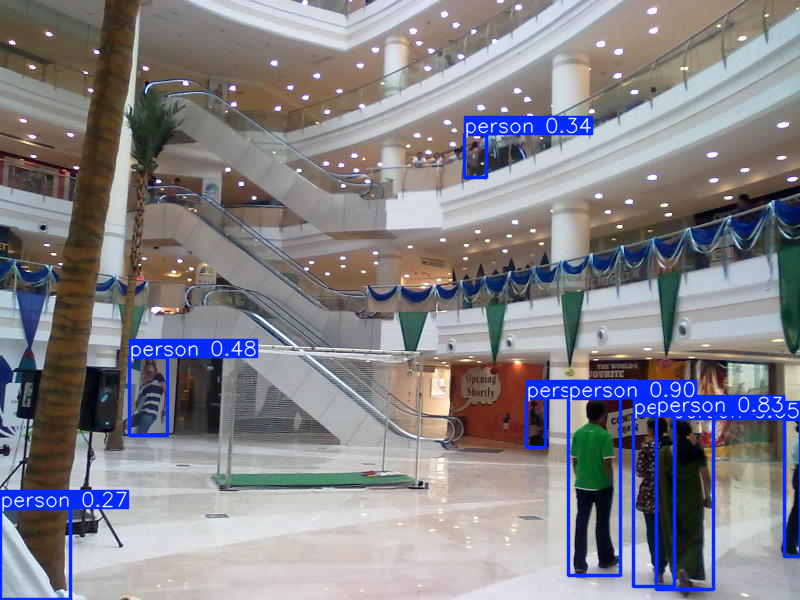

In [2]:
# Load an image
img_path = 'mall.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run inference
results = model(img_rgb)

# Print results
results.print()

# Display results
results.show()




In [3]:
# Function to run YOLOv5 on a frame and draw bounding boxes
def process_frame(frame):
    # Convert frame to RGB
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(img_rgb)

    # Process results
    labels, cords = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-1].numpy()
    n = len(labels)
    x_shape, y_shape = frame.shape[1], frame.shape[0]

    for i in range(n):
        row = cords[i]
        if row[4] >= 0.2:  # confidence threshold
            x1, y1, x2, y2 = int(row[0] * x_shape), int(row[1] * y_shape), int(row[2] * x_shape), int(row[3] * y_shape)
            bgr = (0, 255, 0)
            cv2.rectangle(frame, (x1, y1), (x2, y2), bgr, 2)
            cv2.putText(frame, f'{model.names[int(labels[i])]} {row[4]:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, bgr, 2)

    return frame



In [ ]:
# Capture video from the camera
cap = cv2.VideoCapture(0)  # Use 0 for the default camera

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open video stream")
    cap.release()
    cv2.destroyAllWindows()

# Read frames from the camera
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Process frame
    frame = process_frame(frame)

    # Display the resulting frame
    cv2.imshow('YOLOv5 Live', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


2025-03-27 18:50:44.867 python[2198:765468] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-27 18:50:44.867 python[2198:765468] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 